**Data Preparation

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkplot
import thinkstats2

#Read in the data
df = pd.read_excel('Equipment_Pool_Testing_2022_01_20_school_ANON.xlsx')
#df = df.astype({'Days on Customer Clock':float,'Days on Our Clock':float, 'Days at Location':float})

statusData = df['Status']
allocatedCustomerData = df['Allocated Customer']
lastEventLocData = df['Last Event Loc']
daysOnCustomerClockData = df['Days on Customer Clock']
daysAtLocationData = df['Days at Location']
daysOnOurClockData = df['Days on Our Clock']


**Histogram: Status

<AxesSubplot:>

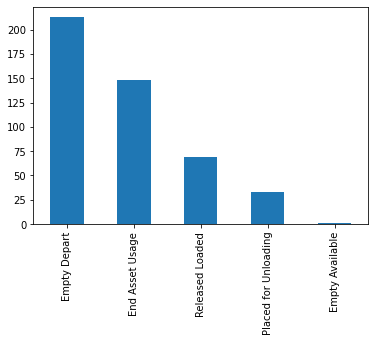

In [129]:
df['Status'].value_counts().plot(kind='bar')

**Histogram: Allocated Customer

<AxesSubplot:>

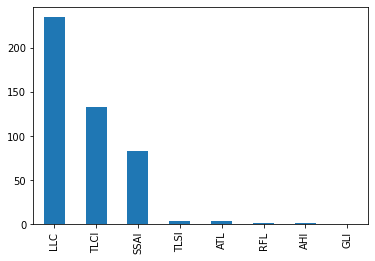

In [130]:
df['Allocated Customer'].value_counts().plot(kind='bar')

**Histogram: Last Event Loc

<AxesSubplot:>

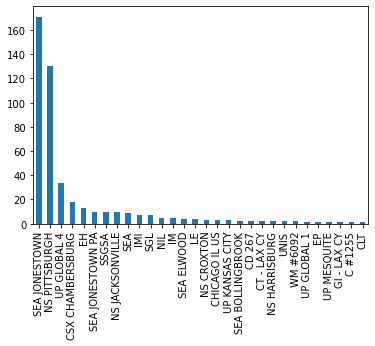

In [131]:
df['Last Event Loc'].value_counts().plot(kind='bar')

**Histogram: Days on Customer Clock

array([[<AxesSubplot:title={'center':'Days on Customer Clock'}>]],
      dtype=object)

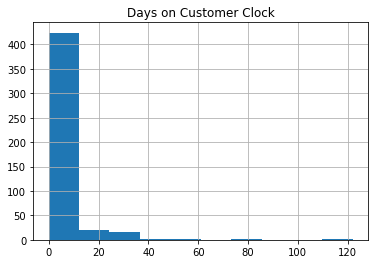

In [132]:
df.hist(column='Days on Customer Clock')

**Histogram: Days at Location

array([[<AxesSubplot:title={'center':'Days at Location'}>]], dtype=object)

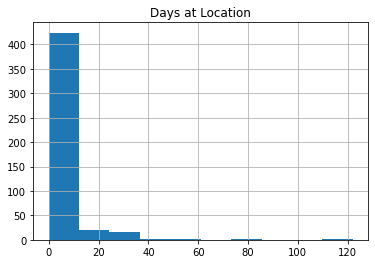

In [133]:
df.hist(column='Days at Location')

**Histogram: Days on Our Clock

array([[<AxesSubplot:title={'center':'Days on Our Clock'}>]], dtype=object)

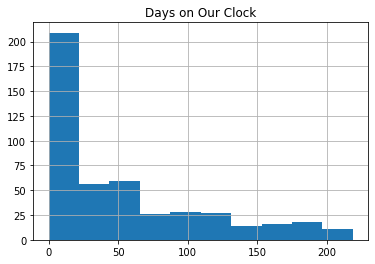

In [134]:
df.hist(column='Days on Our Clock')

**Mean, Mode, Spread, and Tails of variables

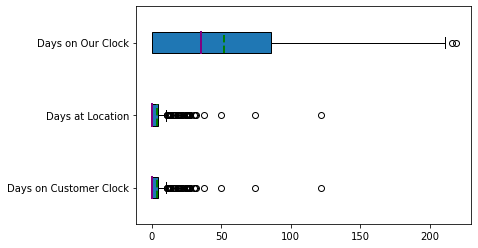

Days on Customer Clock: Mean:  3.869615948275866  Mode:  0.04167  Spread:  85.56467804899191
Days at Location: Mean:  3.869615948275866  Mode:  0.04167  Spread:  85.56467804899191
Days on Our Clock: Mean:  51.70106834051722  Mode:  0.0  Spread:  3545.069429970286


In [135]:
fig, ax = plt.subplots()
ax.boxplot((daysOnCustomerClockData, daysAtLocationData, daysOnOurClockData),
    vert=False, 
    showmeans=True, 
    meanline=True, 
    labels=('Days on Customer Clock', 'Days at Location', 'Days on Our Clock'),
    patch_artist=True,
    medianprops={'linewidth':2, 'color' : 'purple'},
    meanprops={'linewidth' : 2, 'color' : 'green'})
plt.show()
print('Days on Customer Clock: Mean: ', df['Days on Customer Clock'].mean(), ' Mode: ', daysOnCustomerClockData.mode().iloc[0], ' Spread: ', df['Days on Customer Clock'].var())
print('Days at Location: Mean: ', df['Days at Location'].mean(), ' Mode: ', daysAtLocationData.mode().iloc[0], ' Spread: ', df['Days at Location'].var())
print('Days on Our Clock: Mean: ', df['Days on Our Clock'].mean(), ' Mode: ', daysOnOurClockData.mode().iloc[0], ' Spread: ', df['Days on Our Clock'].var())


**Probability Mass Fuction: Days on Customer Clock still on customer clock vs not on customer clock

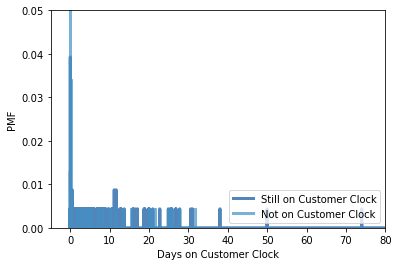

<Figure size 576x432 with 0 Axes>

In [136]:
dfStillOnCustomerClock = df[df['Allocated Customer'] != 'LLC']
dfNotOnCustomerClock = df[df['Allocated Customer'] == 'LLC']
stillPmf = thinkstats2.Pmf(dfStillOnCustomerClock['Days on Customer Clock'],label='Still on Customer Clock')
notPmf = thinkstats2.Pmf(dfNotOnCustomerClock['Days on Customer Clock'],label='Not on Customer Clock')
axis = [-5, 80, 0, 0.05]
thinkplot.PrePlot(2)
thinkplot.Pmfs([stillPmf,notPmf])
thinkplot.Config(xlabel='Days on Customer Clock', ylabel='PMF', axis=axis)
thinkplot.show()

**CDF of Days on Customer Clock to help determine top 10%

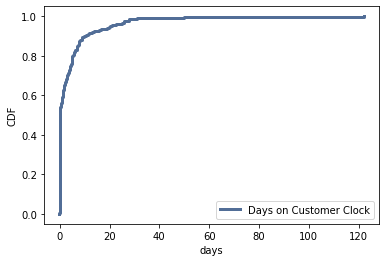

The 10% highest days on the customer clock are  9.96319  days and higher


<Figure size 576x432 with 0 Axes>

In [137]:
cdf = thinkstats2.Cdf(df['Days on Customer Clock'], label = 'Days on Customer Clock')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='days', ylabel='CDF')
print('The 10% highest days on the customer clock are ',cdf.Value(0.90),' days and higher')

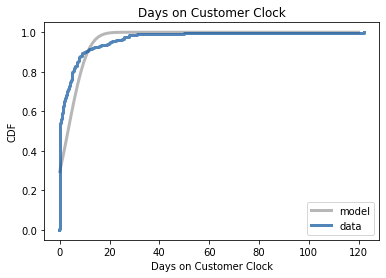

In [160]:
mu, var = thinkstats2.TrimmedMeanVar(daysOnCustomerClockData, p=0.01)
sigma = np.sqrt(var)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=120)

thinkplot.Plot(xs, ps, label='model', color='0.6')

cdf = thinkstats2.Cdf(daysOnCustomerClockData, label='data')
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title='Days on Customer Clock', xlabel='Days on Customer Clock', ylabel='CDF')

**Scatterplot of Days on Customer Clock by Days at Location

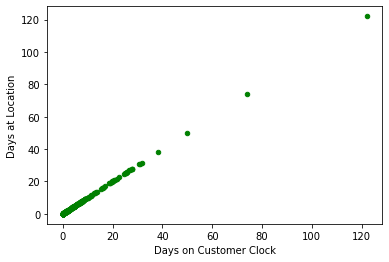

In [163]:
ax = df.plot.scatter(x='Days on Customer Clock', y='Days at Location', c='Green')

**Scatterplot of Days on Customer Clock by Days on Our Clock

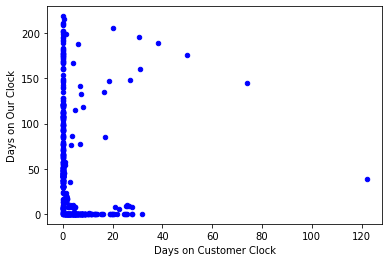

In [164]:
ax2 = df.plot.scatter(x='Days on Customer Clock', y='Days on Our Clock', c='Blue')

**Hypothesis test: Order status Placed for Unloading has longest average per diem

In [166]:
#We're going to compare the mean Days on Customer Clock for orders in Placed for Unloading status versus other statuses
class StatusTest(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        unloading, other = data
        test_stat = abs(unloading.mean() - other.mean())
        return test_stat
    
    def MakeModel(self):
        unloading, other = self.data
        self.n, self.m = len(unloading), len(other)
        self.pool = np.hstack((unloading, other))
        
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

The hypothesis that orders in status Placed for Loading have a higher number of Days on Customer Clock than others has a pvalue of:  0.063
This is on the borderline of being statistically significant


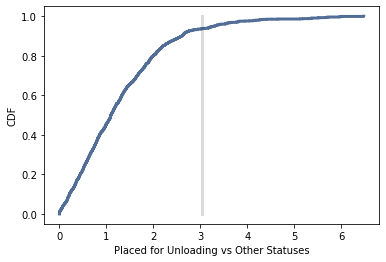

<Figure size 576x432 with 0 Axes>

In [170]:
unloadingdf = df[df['Status'] == 'Placed for Unloading']
otherdf = df[df['Status'] != 'Placed for Unloading']
data = unloadingdf['Days on Customer Clock'].values, otherdf['Days on Customer Clock'].values
ht = StatusTest(data)
pvalue = ht.PValue()
print('The hypothesis that orders in status Placed for Loading have a higher number of Days on Customer Clock than others has a pvalue of: ', pvalue)
print('This is on the borderline of being statistically significant')
ht.PlotCdf()
thinkplot.Show(xlabel='Placed for Unloading vs Other Statuses', ylabel='CDF')

**Regression analysis using Days at Location to predict Days on Customer Clock

In [178]:
def LeastSquares(xs, ys):
    meanx, varx = thinkstats2.MeanVar(xs)
    meany = thinkstats2.Mean(ys)
    
    slope = thinkstats2.Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx
    
    return inter, slope

def  FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter+slope*fit_xs
    return fit_xs, fit_ys

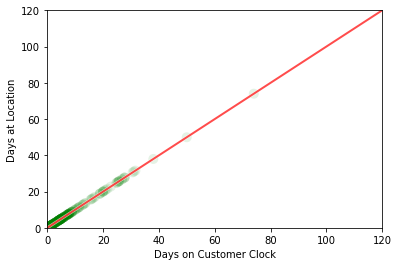

In [188]:
ourDays = df['Days at Location']
custDays = df['Days on Customer Clock']
inter, slope = LeastSquares(custDays, ourDays)
fit_xs, fit_ys = FitLine(custDays, inter, slope)
thinkplot.Scatter(custDays, ourDays, color='green', alpha=0.1, s=100)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel='Days on Customer Clock', ylabel='Days at Location', axis=[0, 120, 0, 120], legend=False)